In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [71]:
# read data
hapiness = pd.read_csv('processed_happiness.csv')

## transform the string to float
hapiness['Happiness Score'] = hapiness['Happiness Score'].apply(lambda x: float(x))
hapiness['Economy (GDP per Capita)'] = hapiness['Economy (GDP per Capita)'].apply(lambda x: float(x))
hapiness['Family (Social Support)'] = hapiness['Family (Social Support)'].apply(lambda x: float(x))
hapiness['Health (Life Expectancy)'] = hapiness['Health (Life Expectancy)'].apply(lambda x: float(x))
hapiness['Freedom'] = hapiness['Freedom'].apply(lambda x: float(x))
hapiness['Trust (Government Corruption)'] = hapiness['Trust (Government Corruption)'].apply(lambda x: float(x))
hapiness['Generosity'] = hapiness['Generosity'].apply(lambda x: float(x))
hapiness['Region'] = hapiness['Region'].apply(lambda x: str(x))

hapiness.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


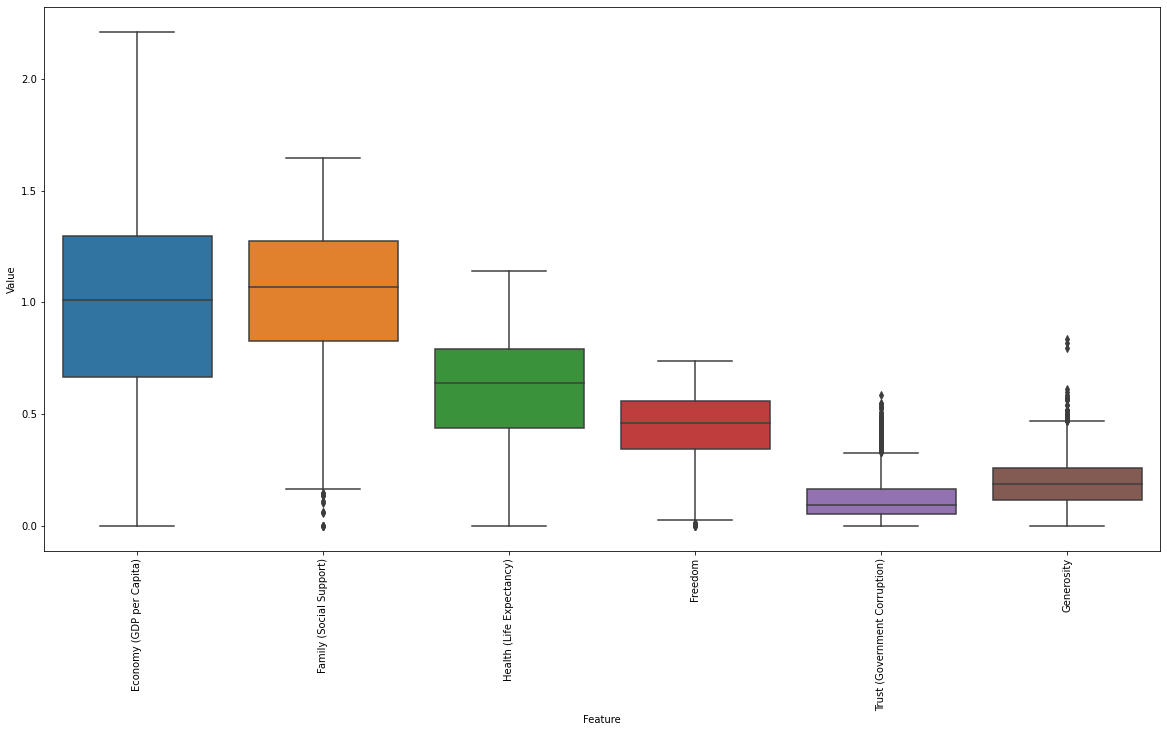

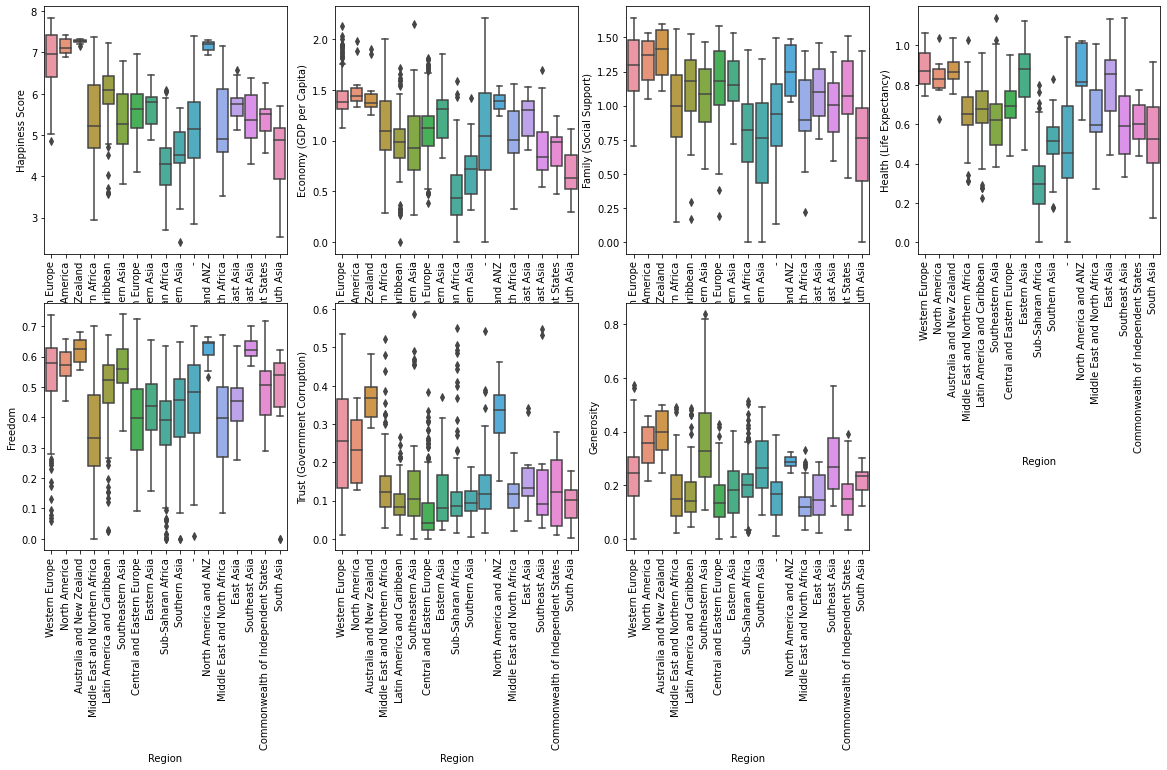

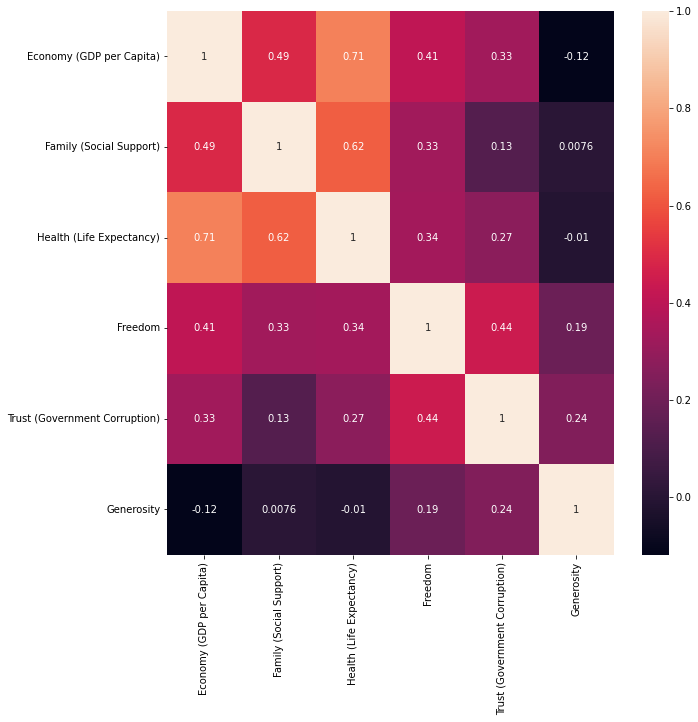

In [78]:
# EDA

## draw the boxplot of each feature
### transform the data to long format
hapiness_long = hapiness.melt(id_vars=['Country', 'Region', 'Year', 'Happiness Score'], value_vars=['Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'], var_name='Feature', value_name='Value')
### draw the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Feature', y='Value', data=hapiness_long)
plt.xticks(rotation=90)
plt.show()

## draw all boxplot in one figure
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.boxplot(x='Region', y='Happiness Score', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 2)
sns.boxplot(x='Region', y='Economy (GDP per Capita)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 3)
sns.boxplot(x='Region', y='Family (Social Support)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 4)
sns.boxplot(x='Region', y='Health (Life Expectancy)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 5)
sns.boxplot(x='Region', y='Freedom', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 6)
sns.boxplot(x='Region', y='Trust (Government Corruption)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 7)
sns.boxplot(x='Region', y='Generosity', data=hapiness)
plt.xticks(rotation=90)
plt.show()

## draw the correlation heatmap of features
happiness_feature = hapiness[['Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
happiness_feature.to_csv('happiness_feature.csv', index=False)
plt.figure(figsize=(10, 10))
sns.heatmap(happiness_feature.corr(), annot=True)
plt.show()

In [76]:
## print all the regions
print(hapiness['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia' '-' 'North America and ANZ'
 'Middle East and North Africa' 'East Asia' 'Southeast Asia'
 'Commonwealth of Independent States' 'South Asia']


In [58]:
## square root transformation for trust and generosity
hapiness['Trust (Government Corruption)'] = hapiness['Trust (Government Corruption)'].apply(lambda x: np.sqrt(x))
hapiness['Generosity'] = hapiness['Generosity'].apply(lambda x: np.sqrt(x))

# ## log transformation for trust and generosity
# hapiness['Trust (Government Corruption)'] = hapiness['Trust (Government Corruption)'].apply(lambda x: np.log(x))
# hapiness['Generosity'] = hapiness['Generosity'].apply(lambda x: np.log(x))

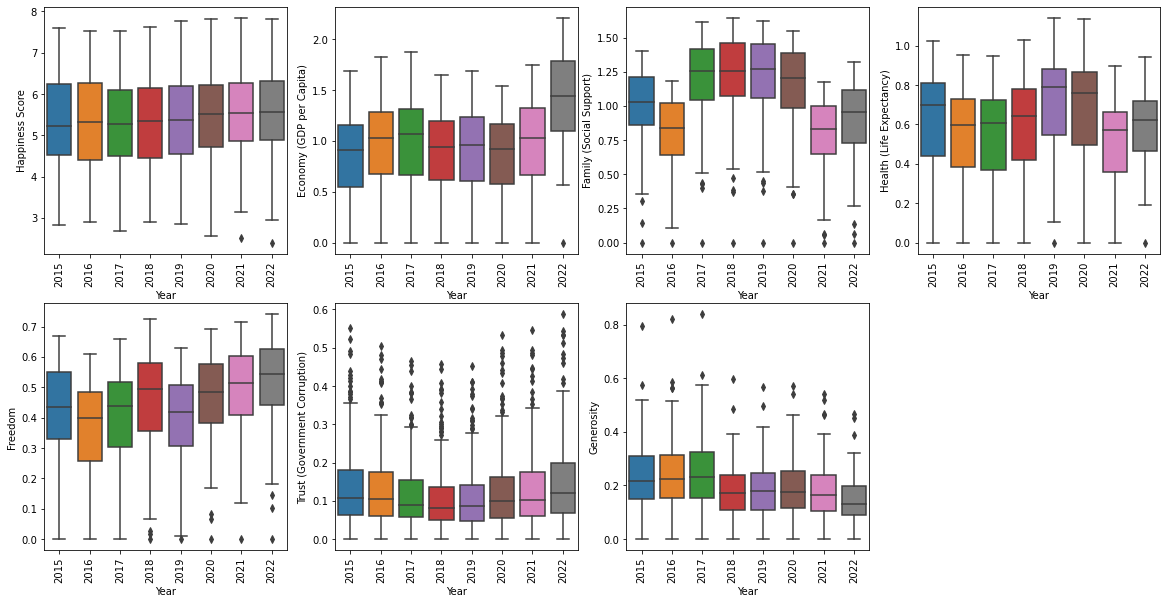

In [73]:
## according to year to draw the boxplot of each feature
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.boxplot(x='Year', y='Happiness Score', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 2)
sns.boxplot(x='Year', y='Economy (GDP per Capita)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 3)
sns.boxplot(x='Year', y='Family (Social Support)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 4)
sns.boxplot(x='Year', y='Health (Life Expectancy)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 5)
sns.boxplot(x='Year', y='Freedom', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 6)
sns.boxplot(x='Year', y='Trust (Government Corruption)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 7)
sns.boxplot(x='Year', y='Generosity', data=hapiness)
plt.xticks(rotation=90)
plt.show()

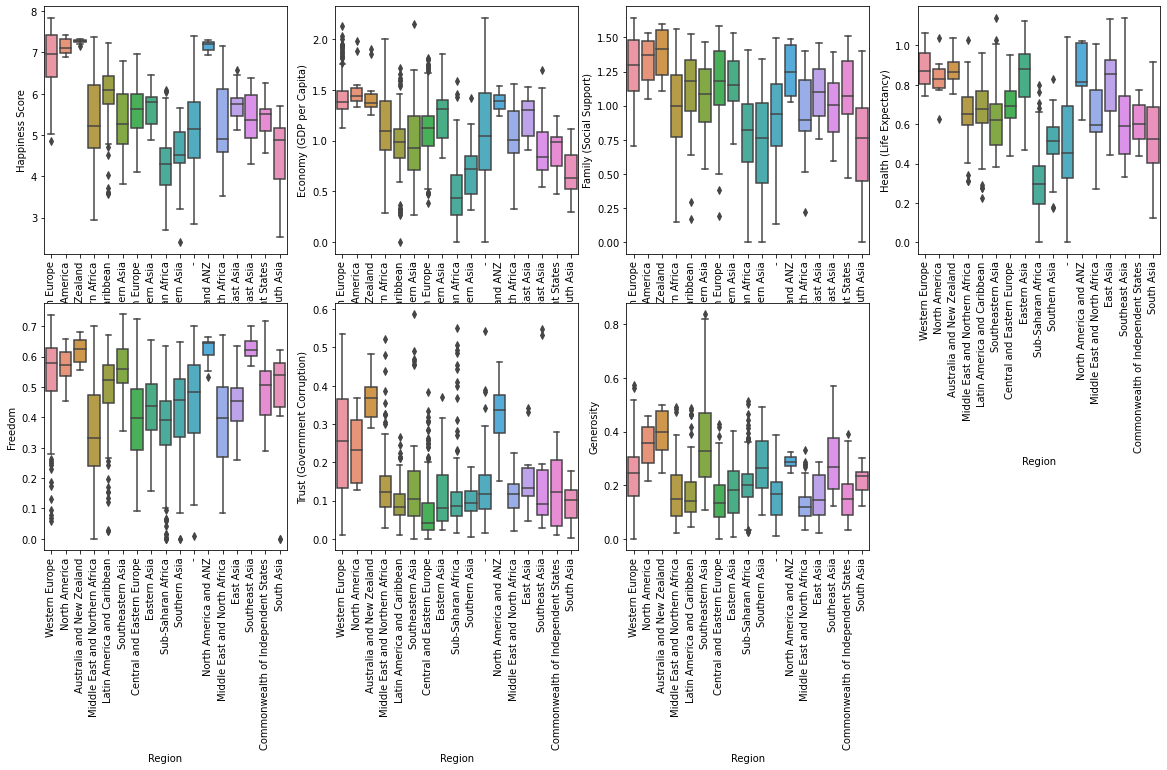

In [74]:
## according to region to draw the boxplot of each feature
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.boxplot(x='Region', y='Happiness Score', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 2)
sns.boxplot(x='Region', y='Economy (GDP per Capita)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 3)
sns.boxplot(x='Region', y='Family (Social Support)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 4)
sns.boxplot(x='Region', y='Health (Life Expectancy)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 5)
sns.boxplot(x='Region', y='Freedom', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 6)
sns.boxplot(x='Region', y='Trust (Government Corruption)', data=hapiness)
plt.xticks(rotation=90)
plt.subplot(2, 4, 7)
sns.boxplot(x='Region', y='Generosity', data=hapiness)
plt.xticks(rotation=90)
plt.show()

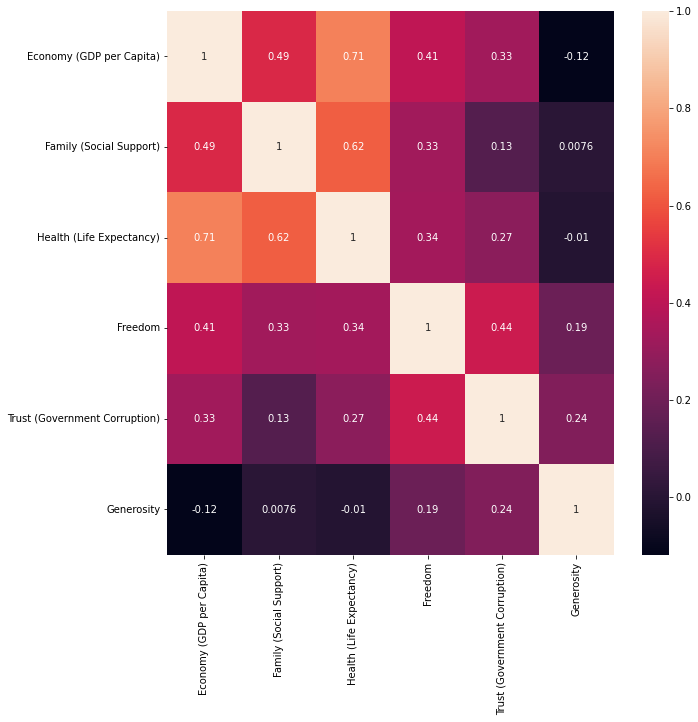

In [75]:
## draw the heatmap of each feature
happiness_feature_trans = hapiness[['Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
happiness_feature_trans.to_csv('happiness_feature_trans.csv', index=False)
plt.figure(figsize=(10, 10))
sns.heatmap(happiness_feature_trans.corr(), annot=True)
plt.show()